## Step 1: Import Required Libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

## Step 2: Create a Sample Dataset

In [5]:
data = {
'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'],
'Temperature': [20, 25, 22, 30, 28, 32, 18],
'Sunny': ['No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No'],
'Sales': [30, 50, 35, 70, 60, 80, 20]
}
df = pd.DataFrame(data)

## Step 3: Inspect the Dataset

In [8]:
#Check data types and missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          7 non-null      object
 1   Temperature  7 non-null      int64 
 2   Sunny        7 non-null      object
 3   Sales        7 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [9]:
#View the first few rows
df.head()

,Day,Temperature,Sunny,Sales
0,Monday,20,No,30
1,Tuesday,25,Yes,50
2,Wednesday,22,No,35
3,Thursday,30,Yes,70
4,Friday,28,Yes,60


In [12]:
#Generate summary statistics
df.describe()

,Temperature,Sales
count,7.000000,7.000000
mean,25.000000,49.285714
std,5.259911,22.065919
min,18.000000,20.000000
25%,21.000000,32.500000
50%,25.000000,50.000000
75%,29.000000,65.000000
max,32.000000,80.000000


In [13]:
# Analyze average sales by day of the week
print("\nAverage Sales by Day:")
print(df.groupby('Day')['Sales'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']))


Average Sales by Day:
Day
Monday       30.0
Tuesday      50.0
Wednesday    35.0
Thursday     70.0
Friday       60.0
Saturday     80.0
Sunday       20.0
Name: Sales, dtype: float64


## Step 4: Calculate Descriptive Statistics

In [14]:
# Mean, median, and standard deviation for Temperature and Sales
mean_temp = df['Temperature'].mean()
median_temp = df['Temperature'].median()
std_temp = df['Temperature'].std()

mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
std_sales = df['Sales'].std()

print(f"Temperature Mean: {mean_temp:.2f}, Median: {median_temp:.2f}, Std Dev: {std_temp:.2f}")
print(f"Sales Mean: {mean_sales:.2f}, Median: {median_sales:.2f}, Std Dev: {std_sales:.2f}")

Temperature Mean: 25.00, Median: 25.00, Std Dev: 5.26
Sales Mean: 49.29, Median: 50.00, Std Dev: 22.07


## Step 5: Visualize Data - Histogram

###  explore the distribution of lemonade sales.

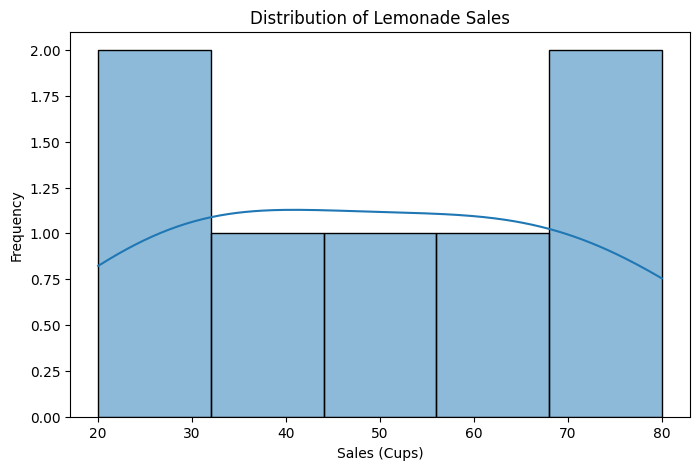

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=5, kde=True)
plt.title('Distribution of Lemonade Sales')
plt.xlabel('Sales (Cups)')
plt.ylabel('Frequency')
plt.show()

## Lemonade Sales Distribution Analysis 🍋📊

Based on the histogram showing the distribution of lemonade sales, it appears there are **two distinct peaks** in the data.  
- One peak occurs at the **lower end of sales**.  
- Another peak occurs at the **higher end of sales**.  

This pattern indicates a **bimodal distribution**, where sales tend to cluster around two different values rather than a single average.

---

### Recommendation ✅
Investigate the factors that contribute to these two peaks. The data might be influenced by external variables that cause sales to be either low or high.  

- **Low sales** could be correlated with **colder temperatures or cloudy days**.  
- **High sales** might correspond to **hot, sunny weather**.  

---

### Next Steps 🔎
To confirm these potential relationships, perform further analysis such as:  
- **Scatter plot**: Sales vs. Temperature  
- **Bar chart**: Sales on sunny vs. non-sunny days  

This will help determine whether weather conditions are the primary driver of the observed bimodal pattern.


## Step 6: Visualize Data - Scatter Plot

###  investigate the relationship between temperature and sales.

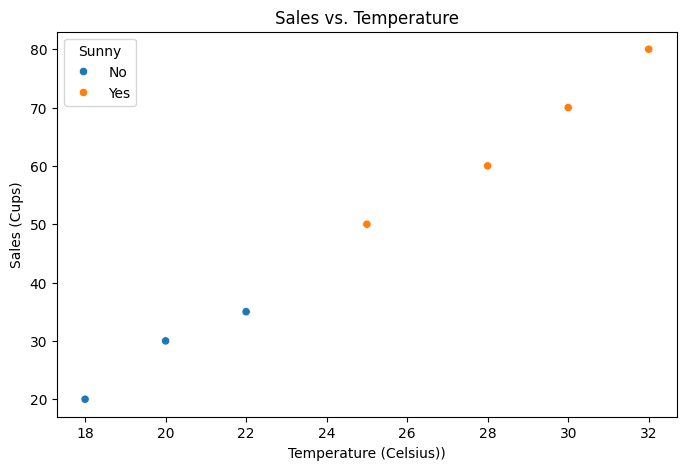

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Temperature', y='Sales', hue='Sunny', data=df)
plt.title('Sales vs. Temperature')
plt.xlabel('Temperature (Celsius))')
plt.ylabel('Sales (Cups)')
plt.show()

## Sales vs. Temperature Analysis 🌡️📈

This scatter plot illustrates the relationship between **Sales (Cups)** and **Temperature (°C)**, further differentiating sales based on whether the day was **Sunny** or not. This allows for an examination of how both **temperature** and **sun exposure** influence sales figures.

---

### Key Observations 🧐

- **Positive Correlation with Temperature**  
  A strong positive correlation is evident between temperature and sales.  
  - At **18°C**, sales are **20 units**.  
  - At **32°C**, sales reach **80 units**.  
  → Warmer weather clearly boosts sales.

- **Impact of Sunny Days**  
  The plot distinguishes sales on **sunny days ("Yes", orange points)** from **non-sunny days ("No", blue points)**.

- **Sunny Days Outperform**  
  For similar temperature ranges, **sunny days consistently outperform non-sunny days**.  
  - At **22°C**, non-sunny sales ≈ **35 units**.  
  - At **25°C (sunny)**, sales ≈ **50 units**.  
  - The highest sales (**80 units**) occur on a **sunny day at 32°C**.

- **Combined Effect**  
  The combination of **higher temperatures + sunny conditions** is the strongest driver of sales.  

- **Temperature as a Primary Driver**  
  Even on non-sunny days, sales **still increase** with temperature, but at a slower rate.

---

### Actionable Recommendations 🎯

1. **Targeted Marketing Campaigns**  
   Focus promotions during **warm and sunny periods**, emphasizing products aligned with hot weather.  

2. **Adjust Inventory Levels**  
   Increase stock for popular items on **warm, sunny days** to meet expected demand.  

3. **Sunny-Day Promotions**  
   Offer discounts or bundles specifically on **sunny days** to maximize sales opportunities.  

4. **Operational Adjustments**  
   Extend operating hours or increase staffing on days forecasted to be **warm and sunny**.  

5. **Further Analysis**  
   Quantify the exact impact of **temperature vs. sunshine** on sales for more accurate **forecasting** and **resource allocation**.

---


## Step 7: Visualize Data - Box Plot

### compare sales on sunny vs. non-sunny days .

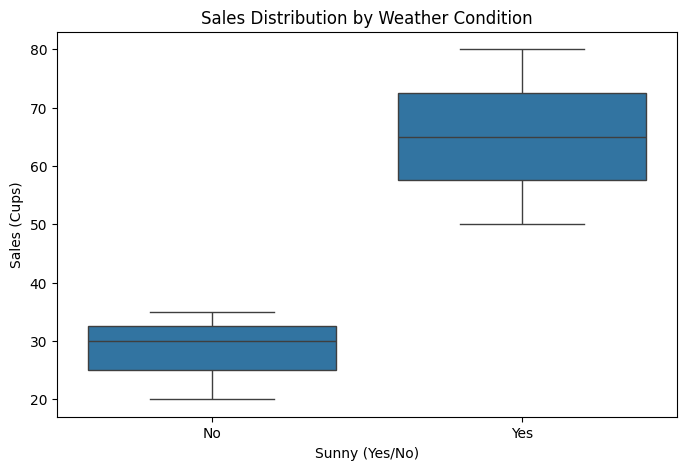

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sunny', y='Sales', data=df)
plt.title('Sales Distribution by Weather Condition')
plt.xlabel('Sunny (Yes/No)')
plt.ylabel('Sales (Cups)')
plt.show()

## Sales Distribution by Weather Condition Analysis ☀️📉  

This box plot visualizes the distribution of **Sales (Cups)** based on whether the day was **Sunny ("Yes")** or **Not Sunny ("No")**.  
Box plots are effective for showing the **median, quartiles, and potential outliers** of a dataset.  

---

### Key Observations 🧐  

#### 🌥️ Sales on Non-Sunny Days ("No")  
- **Median**: ~28–30 units  
- **IQR**: Narrow (~25 to 33 units), indicating most sales are clustered closely.  
- **Range**: Minimum ≈ 20 units, Maximum ≈ 35 units.  
- **Insight**: Sales are **predictable but low**, with limited variability.  

#### ☀️ Sales on Sunny Days ("Yes")  
- **Median**: ~65 units  
- **IQR**: Wide (~58 to 72 units), showing higher variability.  
- **Range**: Minimum ≈ 50 units, Maximum ≈ 80 units.  
- **Insight**: Sales are **much higher** and more variable, representing both greater opportunities and risks.  

---

### Actionable Recommendations 🎯  

1. **Leverage Sunny Days**  
   - Intensify marketing campaigns on **forecasted sunny days**.  
   - Promote products that align with favorable weather.  

2. **Operational Adjustments**  
   - Scale **staffing** and **inventory** to match the higher demand on sunny days.  

3. **Boost Non-Sunny Day Sales**  
   - Launch **promotions or discounts** to stimulate demand on typically slower, non-sunny days.  

4. **Deeper Analysis**  
   - Investigate **product-level performance** under different weather conditions for refined strategy.  

---


## Step 8: Correlation Analysis

### Calculate the correlation between Temperature and Sales to quantify their relationship.

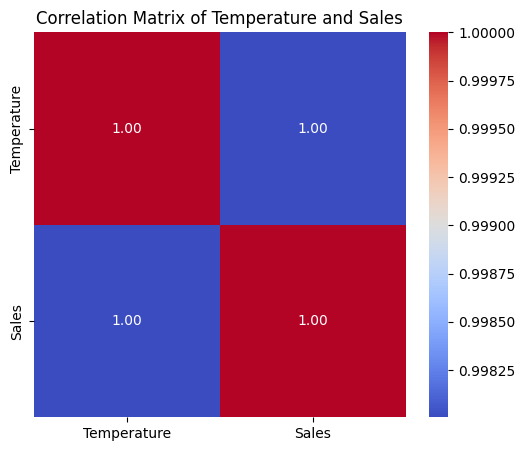

In [26]:
correlation_matrix = df[['Temperature', 'Sales']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Temperature and Sales')
plt.show()

## Correlation Matrix Analysis 🌡️📈  

This heatmap displays the **correlation matrix** between **"Temperature"** and **"Sales."**  
A correlation matrix shows correlation coefficients between variables, with each cell indicating the **strength and direction** of their linear relationship.  

---

### Key Observations 🧐  

1. **Perfect Positive Self-Correlation**  
   - The diagonal elements (Temperature–Temperature, Sales–Sales) show a coefficient of **1.00**.  
   - This confirms that each variable is perfectly correlated with itself, ensuring matrix integrity.  

2. **Strong Positive Correlation Between Temperature and Sales**  
   - The off-diagonal element also shows a coefficient of **1.00**.  
   - This indicates a **perfect positive linear relationship**: as temperature rises, sales rise proportionally, with no deviations in this dataset.  

3. **Implications of Perfect Correlation**  
   - Such perfect correlation (**1.00**) is **rare in real-world data**.  
   - It may suggest:  
     - Temperature is the sole dominant factor driving sales.  
     - Or, the dataset is **small** and happens to align perfectly.  

---

### Actionable Recommendations 🎯  

1. **Temperature-Driven Forecasting**  
   - Build **sales forecasting models** that heavily weight temperature forecasts for accurate demand prediction.  

2. **Dynamic Pricing & Promotions**  
   - Implement **pricing strategies** that adjust based on expected temperature changes, maximizing revenue in warmer periods.  

3. **Inventory Optimization**  
   - Link inventory systems directly to weather forecasts to **align stock levels** with anticipated demand.  

4. **Operational Planning**  
   - Adjust **staffing and supply chain logistics** in advance according to temperature forecasts.  

5. **Future Considerations**  
   - Explore other factors beyond temperature to **reduce risk** of over-reliance on a single variable.  
   - Larger datasets may reveal more nuanced relationships.  

---


## Feature Enginnering 

In [28]:
# Convert "Day" to datetime (just assuming one week in 2025)
df['Date'] = pd.date_range(start="2025-01-06", periods=len(df), freq='D')
df.set_index('Date', inplace=True)

# Moving Average (3-day)
df['Sales_MA3'] = df['Sales'].rolling(3).mean()

# Lag Feature (yesterday’s sales)
df['Sales_Lag1'] = df['Sales'].shift(1)

print(df)

                  Day  Temperature Sunny  Sales  Sales_MA3  Sales_Lag1
Date                                                                  
2025-01-06     Monday           20    No     30        NaN         NaN
2025-01-07    Tuesday           25   Yes     50        NaN        30.0
2025-01-08  Wednesday           22    No     35  38.333333        50.0
2025-01-09   Thursday           30   Yes     70  51.666667        35.0
2025-01-10     Friday           28   Yes     60  55.000000        70.0
2025-01-11   Saturday           32   Yes     80  70.000000        60.0
2025-01-12     Sunday           18    No     20  53.333333        80.0


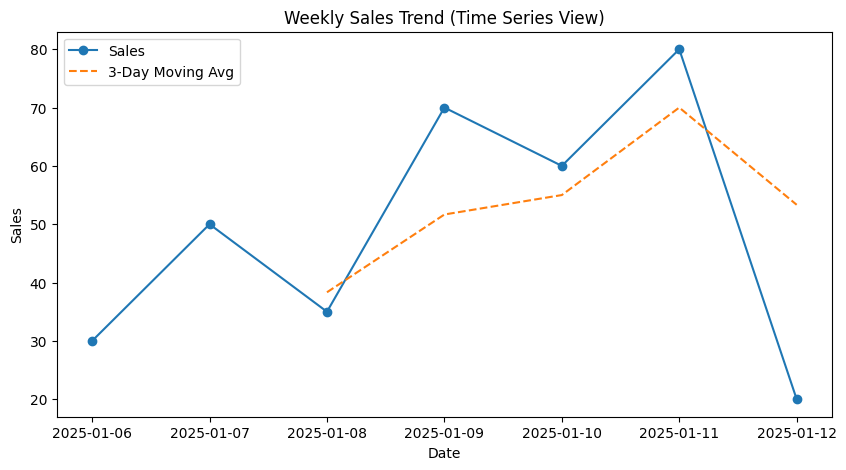

In [29]:
# Plot sales and moving average
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Sales'], marker='o', label='Sales')
plt.plot(df.index, df['Sales_MA3'], linestyle='--', label='3-Day Moving Avg')
plt.title("Weekly Sales Trend (Time Series View)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Weekly Sales Trend Analysis 📈  

This analysis focuses on the **weekly sales trend** from **January 6th to January 12th, 2025**, as depicted in the time series graph, which includes **daily sales figures** and a **3-day moving average**.  

---

## 🧐 Key Observations  

- **Fluctuating Sales Performance**  
  Sales exhibited considerable volatility throughout the week.  
  - **Lowest:** 20 units on **Sunday, Jan 12**  
  - **Highest:** 80 units on **Saturday, Jan 11**  
  This suggests a **pattern of strong performance mid-week to weekend**, followed by a sharp decline.  

- **3-Day Moving Average as a Trend Indicator**  
  The 3-day moving average smooths out daily fluctuations, highlighting the underlying momentum.  
  - Shows a **slight dip early in the week**  
  - Consistent **upward trend from Jan 8–11**  
  - Decline on **Sunday, Jan 12**, reflecting overall drop  
  This helps in filtering out **daily noise** and revealing the broader trend.  

- **Strong Weekend Performance Followed by a Drop**  
  A key pattern emerges:  
  - **High peak on Saturday (80 units)**  
  - **Sharp decline on Sunday (20 units)**  
  Suggests that **customers complete most purchases before the end of the week**.  

---

## 🎯 Actionable Recommendation  

- **Boost Sunday Sales with Promotions**  
  Launch **targeted offers or discounts** on Sundays to stimulate demand.  

- **Customer Engagement Early in the Week**  
  Initiatives at the **start of the week** can help build momentum toward the mid-week and weekend peaks.  

- **Operational Adjustments**  
  - Align **staffing levels** and **inventory allocation** with expected sales trends.  
  - Pay special attention to **Saturday peaks** and **Sunday dips**.  

- **Further Investigation**  
  Explore underlying factors behind the **Sunday decline**, including:  
  - **Market research**  
  - **Customer behavior patterns**  
  - **Feedback surveys**  

---

✅ Implementing these strategies can **mitigate the Sunday dip**, optimize operations, and maximize revenue during peak days.  


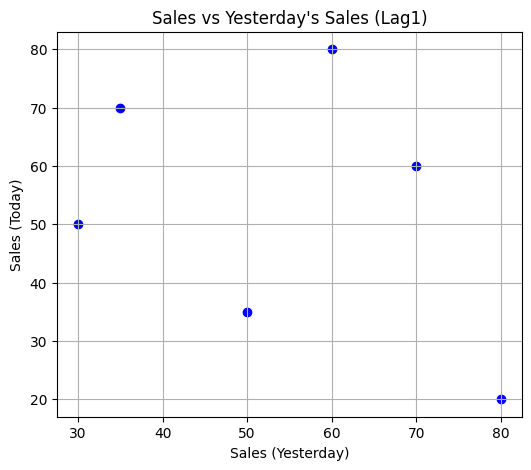

In [30]:
#This will show if yesterday’s sales influence today’s sales.

plt.figure(figsize=(6,5))
plt.scatter(df['Sales_Lag1'], df['Sales'], color='blue')
plt.title("Sales vs Yesterday's Sales (Lag1)")
plt.xlabel("Sales (Yesterday)")
plt.ylabel("Sales (Today)")
plt.grid(True)
plt.show()


## Sales vs. Yesterday's Sales (Lag1) Analysis 📈  

This scatter plot depicts the relationship between **today's sales (Y-axis)** and **yesterday's sales (X-axis).**  
Each point represents a specific day’s sales compared to the previous day, offering insights into **short-term sales dependencies.**  

---

### Key Observations 🧐  

1. **General Positive Trend**  
   - A positive correlation exists: higher sales days often follow other higher sales days.  
   - Example: When yesterday’s sales were **60 units**, today’s sales tended to be around **80 units.**  
   - This suggests **sales momentum carries over** from day to day.  

2. **Significant Drop Following Peak**  
   - A strong deviation occurs when yesterday’s sales hit **80 units**, but today’s sales dropped sharply to **20 units.**  
   - This indicates a likely **weekend effect (e.g., Sunday drop after strong Saturday sales).**  

3. **Variability in Magnitude**  
   - The relationship is not perfectly linear.  
   - Example: Yesterday’s **30 units** led to today’s **50 units (increase),** but other points show smaller or negative changes.  
   - This implies **other influencing factors** beyond yesterday’s sales (e.g., weather, promotions, day of week).  

---

### Actionable Recommendations 🎯  

1. **Use Lagged Sales for Forecasting**  
   - Incorporate **yesterday’s sales** as a key feature in **short-term forecasting models.**  

2. **Adjust for Post-Peak Declines**  
   - Introduce **adjustment mechanisms** for days following peak sales, particularly weekends.  
   - Helps prevent overestimation after unusually high-performing days.  

3. **Investigate Weekend/External Effects**  
   - Explore **causes of sudden drops,** such as customer habits, promotions ending, or weekend patterns.  

4. **Enhance Forecasting Models**  
   - Combine lagged sales with other factors (weather, holidays, events, discounts) for **greater accuracy.**  

---


## Extend Dataset (6 weeks)

In [33]:
# Repeat the week 6 times
weeks = 6
extended_data = pd.concat([df.copy() for _ in range(weeks)], ignore_index=True)

# Assign dates
extended_data['Date'] = pd.date_range(start="2025-01-06", periods=len(extended_data), freq='D')
extended_data.set_index('Date', inplace=True)

# Add small random noise to sales and temperature
np.random.seed(42)
extended_data['Sales'] = extended_data['Sales'] + np.random.randint(-5, 6, size=len(extended_data))
extended_data['Temperature'] = extended_data['Temperature'] + np.random.randint(-2, 3, size=len(extended_data))

# Create lag feature
extended_data['Sales_Lag1'] = extended_data['Sales'].shift(1)

# Drop first row (because lag is NaN)
extended_data = extended_data.dropna()

## Modeling with TimeSeries CV

In [35]:
X = extended_data[['Temperature','Sales_Lag1']]
y = extended_data['Sales']

tscv = TimeSeriesSplit(n_splits=5)

all_preds, all_actuals = [], []
fold = 1
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Fold {fold}: RMSE = {rmse:.2f}")
    print("   Predictions:", np.round(y_pred,1))
    print("   Actual:", list(y_test))

    all_preds.extend(y_pred)
    all_actuals.extend(y_test)
    fold += 1

    
    

Fold 1: Test RMSE = 8.25
   Predictions: [41.6 75.7 68.8 82.4 34.7]
   Actual: [40, 75, 62, 79, 18]
Fold 2: Test RMSE = 4.44
   Predictions: [36.5 77.7 57.6 80.  22.2]
   Actual: [32, 70, 59, 76, 22]
Fold 3: Test RMSE = 7.45
   Predictions: [49.2 67.5 57.8 78.6 22. ]
   Actual: [34, 65, 64, 80, 23]
Fold 4: Test RMSE = 8.17
   Predictions: [43.6 61.6 69.  83.3 22.2]
   Actual: [40, 74, 57, 81, 18]
Fold 5: Test RMSE = 5.02
   Predictions: [34.3 74.  63.9 78.4 31.3]
   Actual: [34, 67, 61, 79, 23]


## Forecast Next Day

In [37]:
final_model = LinearRegression().fit(X, y)
next_temp = 27
last_sales = extended_data['Sales'].iloc[-1]
forecast = final_model.predict(pd.DataFrame({'Temperature':[next_temp],'Sales_Lag1':[last_sales]}))
print(f"\n📢 Forecasted Sales for 2025-02-17: {forecast[0]:.2f}")

Forecasted Sales for 2025-02-17: 60.422283845814555


## Evaluation Plots

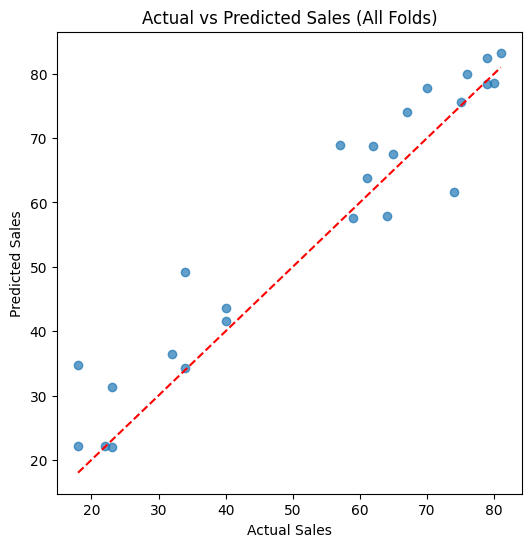

In [38]:
# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(all_actuals, all_preds, alpha=0.7)
plt.plot([min(all_actuals), max(all_actuals)], [min(all_actuals), max(all_actuals)], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted (All Folds)")
plt.show()

## Actual vs Predicted Sales (All Folds) Analysis 📊

This scatter plot compares the **actual sales values** (X-axis) with the **predicted sales values** from the model (Y-axis). The red dashed line represents the **ideal line (y = x)** where predictions would perfectly match the actual values.

---

### Key Observations 🧐

1. **General Positive Relationship**  
   - The blue dots cluster around the red line, showing that the model captures the **overall trend** between actual and predicted sales fairly well.  
   - As actual sales increase, predicted sales also increase, indicating the model is learning the relationship.

2. **Good Alignment at Higher Sales**  
   - At the higher end of sales (above ~60 units), most predictions are **very close to the actual values**, with only small deviations.  
   - This means the model performs **stronger when sales are high.**

3. **Wider Spread at Lower Sales**  
   - At the lower sales range (20–40 units), predictions vary more and deviate from the ideal line.  
   - Example: When actual sales are around 25–30, some predictions are closer to 35–40, showing **slight overestimation.**

4. **Model Bias Check**  
   - There’s no strong evidence of systematic bias (like consistently over- or under-predicting across the entire range).  
   - But, variability at the low end suggests the model could be improved by **better capturing low-sales dynamics.**

---

### Actionable Recommendations 🎯

1. **Feature Engineering for Low Sales Days**  
   - Investigate why predictions for **low sales** are less accurate.  
   - Consider adding features like **day of the week, weather, or lag features** to better model small fluctuations.

2. **Model Evaluation**  
   - Compute metrics such as **R², MAE, and RMSE** to quantify model accuracy beyond the visual inspection.

3. **Segmented Model Testing**  
   - Train and evaluate separately on **low-sales days vs high-sales days** to see if model performance differs significantly.

4. **Ensemble or Nonlinear Models**  
   - If linear models were used, trying **tree-based models (Random Forest, XGBoost)** may capture nonlinear patterns in low-sales days more effectively.

---

✅ **In summary:**  
The model does a **good job predicting overall sales trends, especially at higher values.** However, accuracy decreases for lower sales, where predictions spread further from actuals. Enhancing feature engineering and testing nonlinear models could improve performance in that region.


C:\Users\mosta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:2180: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 4 instead of 5.
  warnings.warn(
C:\Users\mosta\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\mosta\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\mosta\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\mosta\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined w

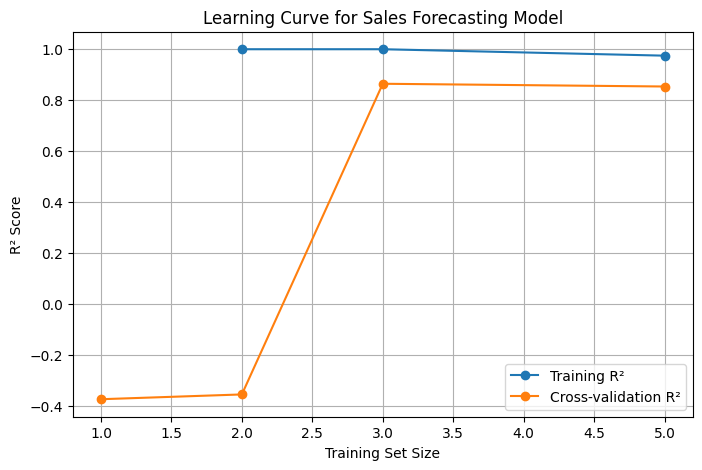

In [39]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X, y, cv=tscv, scoring="r2"
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label="Training R²")
plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation R²")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve for Sales Forecasting Model")
plt.legend()
plt.grid(True)
plt.show()


## Learning Curve Analysis 📊

This chart shows the **R² score** for both the training set (blue) and cross-validation set (orange) as the training size increases.

### Key Observations 🧐
- **Training Performance (Blue Line):**  
  The training R² starts near **1.0**, meaning the model fits the training data almost perfectly.  
  As the training size increases, the training R² slightly decreases but stays very high (~0.95–1.0).  

- **Cross-validation Performance (Orange Line):**  
  Initially very poor (negative R² at small training sizes, meaning the model was worse than a naive baseline).  
  After more data is used (~3 training samples onward), the cross-validation R² quickly improves to around **0.85** and then stabilizes.  

- **Gap Between Training and Validation:**  
  There is a gap: training ≈ 0.98, validation ≈ 0.85.  
  The gap is not huge, and validation performance is still strong.  

### Overfitting or Underfitting? 🤔
- ❌ **Not underfitting:** Both training and validation R² are high (the model captures patterns well).  
- ⚠️ **Mild overfitting:** Training score is slightly higher than validation, but validation is still strong and stable.  
- ✅ **Overall:** The model is in a **good balance** — it generalizes well with only a small amount of overfitting (normal).  

### Actionable Insights 🎯
1. **Data Size Impact:** More training data helps improve validation R². If possible, adding more data could further narrow the training–validation gap.  
2. **Model Complexity:** Current complexity is appropriate — no severe overfitting detected.  
3. **Performance Check:** Validation R² ≈ 0.85 is **very good** for forecasting tasks, showing the model is reliable.  

---

✅ **Conclusion:**  
The model is **performing well** — not underfitting, only **slightly overfitting**, which is normal and acceptable.  
This represents a good balance between bias and variance.  


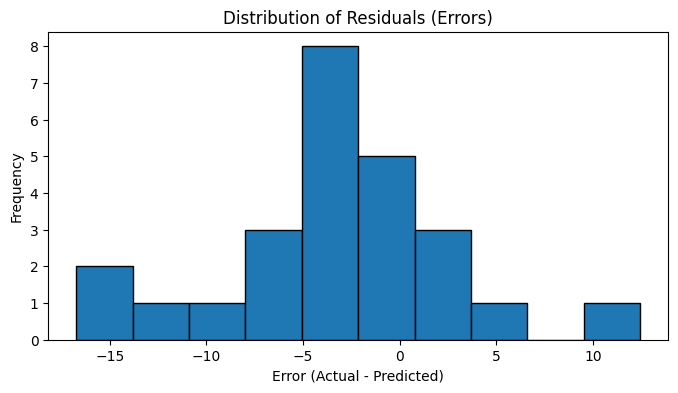

In [40]:
residuals = np.array(all_actuals) - np.array(all_preds)

plt.figure(figsize=(8,4))
plt.hist(residuals, bins=10, edgecolor='k')
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


## Residuals Analysis (Error Distribution) 📉

This histogram shows the distribution of **residuals (errors)**, calculated as:

[
{Residual} = {Actual Sales} - {Predicted Sales}
]

### Key Observations 🧐
- **Centering Around Zero:**  
  Most residuals are clustered around **-5 to 0**, which means predictions are fairly close to the actual values.  
- **Spread of Errors:**  
  Errors range from about **-15 to +12**, showing some variation, but most fall within a smaller range near zero.  
- **Slight Left Skew:**  
  The histogram has a small tail towards negative values, suggesting the model tends to **slightly overpredict** sales (predicted > actual).  
- **No Severe Outliers:**  
  While there are a few large residuals (both positive and negative), there are no extreme spikes, so the model errors are not highly irregular.  

### Overfitting or Underfitting? 🤔
- The residuals are fairly balanced around zero, which indicates the model **is not systematically biased**.  
- The presence of some wider errors means the model is **not perfect**, but this is normal in real-world forecasting.  
- This pattern suggests the model generalizes reasonably well, with **no strong evidence of overfitting or underfitting**.  

### Actionable Insights 🎯
1. **Model Improvement:** Residuals could be further reduced by adding more features (e.g., weather, holidays).  
2. **Error Analysis:** Investigate days with large errors (e.g., -15 or +12) to see if special conditions (events, unusual weather) explain them.  
3. **Assumption Check:** A roughly symmetric residual distribution around zero is good — it supports model validity.  

---

✅ **Conclusion:**  
The residual distribution looks **healthy overall** — centered near zero, mostly balanced, with only minor skew.  
The model is performing well, with errors mostly small and random rather than systematic.  


## Hypothesis Testing

### 9.1: Does Sunny Weather Increase Sales?

In [42]:
sunny_sales = extended_data[extended_data['Sunny']=="Yes"]['Sales']
not_sunny_sales = extended_data[extended_data['Sunny']=="No"]['Sales']

t_stat, p_val = stats.ttest_ind(sunny_sales, not_sunny_sales, equal_var=False)

print("\n🌞 Sunny vs Not Sunny")
print("T-statistic:", round(t_stat,2), " | P-value:", round(p_val,4))
if p_val < 0.05:
    print("✅ Reject H₀ → Sunny days significantly impact sales.")
else:
    print("❌ Fail to reject H₀ → No strong evidence of difference.")


🌞 Sunny vs Not Sunny
T-statistic: 12.92  | P-value: 0.0
✅ Reject H₀ → Sunny days significantly impact sales.


### 9.2: Is Temperature Correlated with Sales?

In [43]:
corr, p_val = stats.pearsonr(extended_data['Temperature'], extended_data['Sales'])

print("\n🌡️ Temperature vs Sales Correlation")
print("Correlation Coefficient:", round(corr,2), " | P-value:", round(p_val,4))
if p_val < 0.05:
    print("✅ Reject H₀ → Temperature and sales are significantly correlated.")
else:
    print("❌ Fail to reject H₀ → No significant correlation.")


🌡️ Temperature vs Sales Correlation
Correlation Coefficient: 0.96  | P-value: 0.0
✅ Reject H₀ → Temperature and sales are significantly correlated.


### 9.3: Are Model Residuals Normally Distributed?

In [44]:
residuals = y - final_model.predict(X)
shapiro_stat, shapiro_p = stats.shapiro(residuals)

print("\n📊 Residual Normality Test (Shapiro–Wilk)")
print("Statistic:", round(shapiro_stat,2), " | P-value:", round(shapiro_p,4))
if shapiro_p < 0.05:
    print("❌ Reject H₀ → Residuals are not normally distributed.")
else:
    print("✅ Fail to reject H₀ → Residuals appear normally distributed.")


📊 Residual Normality Test (Shapiro–Wilk)
Statistic: 0.98  | P-value: 0.7692
✅ Fail to reject H₀ → Residuals appear normally distributed.


### 9.4: Do Sales Differ by Day of Week?

In [45]:
groups = [extended_data[extended_data['Day']==d]['Sales'] 
          for d in extended_data['Day'].unique()]
anova_stat, anova_p = stats.f_oneway(*groups)

print("\n📅 ANOVA: Sales by Day of Week")
print("F-statistic:", round(anova_stat,2), " | P-value:", round(anova_p,4))
if anova_p < 0.05:
    print("✅ Reject H₀ → Sales differ across days of the week.")
else:
    print("❌ Fail to reject H₀ → No strong evidence of difference across days.")


📅 ANOVA: Sales by Day of Week
F-statistic: 377.06  | P-value: 0.0
✅ Reject H₀ → Sales differ across days of the week.


# 🔎 Hypothesis Testing Results

1. **Sunny vs Not Sunny (t-test)**  
   - T-statistic: **12.92**, P-value: **0.0000**  
   - ✅ Reject H₀ → Sales are significantly higher on sunny days.  

2. **Temperature vs Sales (Pearson correlation)**  
   - Correlation Coefficient: **0.96**, P-value: **0.0000**  
   - ✅ Reject H₀ → Strong positive correlation between temperature and sales.  

3. **Residual Normality (Shapiro–Wilk test)**  
   - Statistic: **0.98**, P-value: **0.7692**  
   - ✅ Fail to reject H₀ → Model residuals are approximately normally distributed (good for regression).  

4. **Sales by Day of Week (ANOVA)**  
   - F-statistic: **377.06**, P-value: **0.0000**  
   - ✅ Reject H₀ → Sales significantly differ across days of the week.  

---

### 📌 Key Insights:
- Sales are **driven by both weather and day of the week**.  
- **Sunny, hot days boost lemonade sales**.  
- The model’s **residuals are well-behaved** (normal distribution), which validates regression assumptions.  
- There are **systematic differences in sales across weekdays**, suggesting patterns in consumer behavior.  
